In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, precision_recall_curve, roc_curve

In [2]:
df = pd.read_csv("/kaggle/input/obesity-classification-dataset/Obesity Classification.csv")

In [3]:
df.head()

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      108 non-null    int64  
 1   Age     108 non-null    int64  
 2   Gender  108 non-null    object 
 3   Height  108 non-null    int64  
 4   Weight  108 non-null    int64  
 5   BMI     108 non-null    float64
 6   Label   108 non-null    object 
dtypes: float64(1), int64(4), object(2)
memory usage: 6.0+ KB


In [5]:
df = df.drop(['ID'], axis=1)

In [6]:
df.duplicated().value_counts()

False    108
Name: count, dtype: int64

In [7]:
df.isnull().value_counts()

Age    Gender  Height  Weight  BMI    Label
False  False   False   False   False  False    108
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

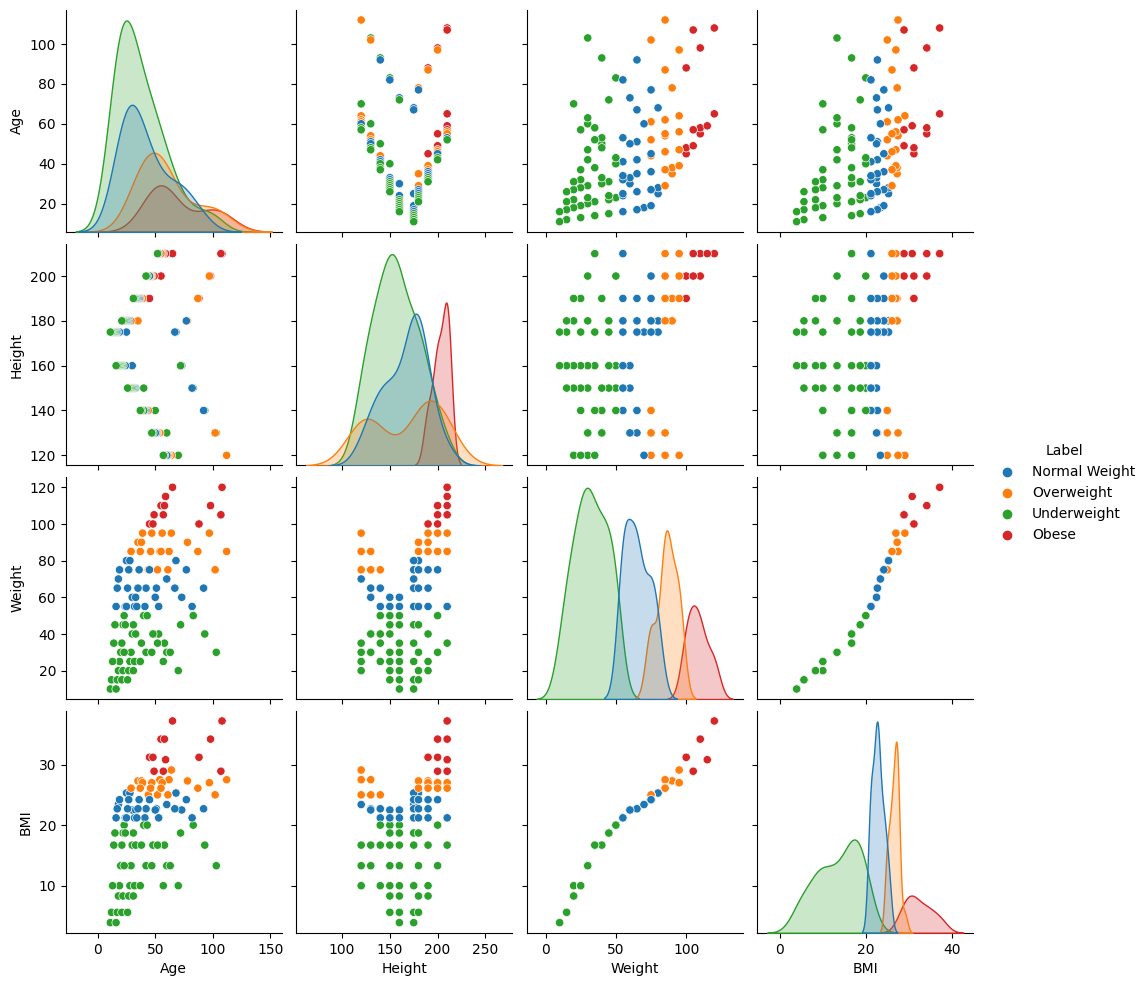

In [8]:
sns.pairplot(data=df, hue='Label')

<Axes: xlabel='Label', ylabel='count'>

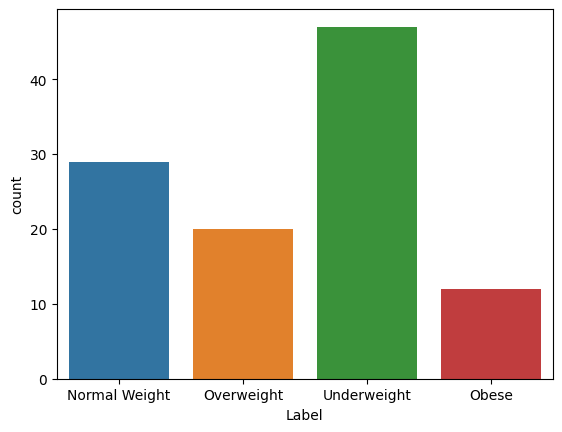

In [9]:
sns.countplot(data=df, x='Label')

<Axes: xlabel='Age', ylabel='Label'>

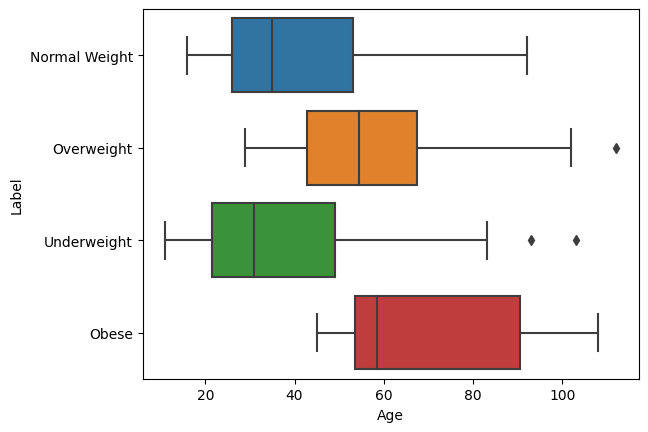

In [10]:
sns.boxplot(x='Age', y='Label',data=df)

In [11]:
df.head()

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese


In [12]:
df

,Age,Gender,Height,Weight,BMI,Label
0,25,Male,175,80,25.3,Normal Weight
1,30,Female,160,60,22.5,Normal Weight
2,35,Male,180,90,27.3,Overweight
3,40,Female,150,50,20.0,Underweight
4,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...
103,11,Male,175,10,3.9,Underweight
104,16,Female,160,10,3.9,Underweight
105,21,Male,180,15,5.6,Underweight
106,26,Female,150,15,5.6,Underweight


In [13]:
df['Label'].replace(['Normal Weight', 'Overweight', 'Underweight', 'Obese'], [1,2,3,4], inplace=True)

df['Gender'].replace(['Male', 'Female'], [1,2], inplace=True)

/tmp/ipykernel_18/1533894114.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Label'].replace(['Normal Weight', 'Overweight', 'Underweight', 'Obese'], [1,2,3,4], inplace=True)
/tmp/ipykernel_18/1533894114.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(['Male', 'Femal

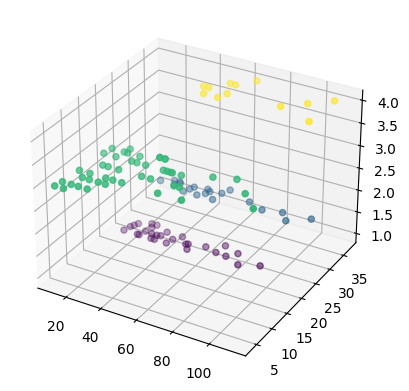

In [14]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Age'],df['BMI'], df['Label'], c=df['Label'])

<Axes: >

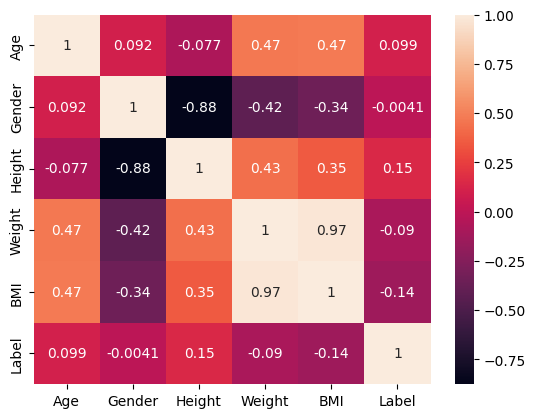

In [15]:
sns.heatmap(df.corr(),annot=True)

In [16]:
X = df.drop('Label', axis=1)
y = df['Label']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [18]:
scaler = StandardScaler()

In [19]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
log_model = LogisticRegression()
log_model.fit(scaled_X_train, y_train)

LogisticRegression()

In [21]:
log_model.coef_

array([[-0.40065051, -0.30176178, -0.45901723, -0.63834522, -0.09957543],
       [ 0.25201523,  0.20053354, -0.22371201,  1.3171009 ,  0.42424486],
       [-0.38306715,  0.30539213, -0.12303247, -2.5126986 , -2.22379358],
       [ 0.53170243, -0.20416389,  0.80576172,  1.83394291,  1.89912416]])

In [22]:
y_pred = log_model.predict(scaled_X_test)

In [23]:
accuracy_score(y_test, y_pred)

0.8181818181818182

In [24]:
confusion_matrix(y_test,y_pred)

array([[4, 1, 0, 0],
       [1, 1, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 1]])

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.80      0.80      0.80         5
           2       0.50      0.50      0.50         2
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         1

    accuracy                           0.82        11
   macro avg       0.82      0.82      0.83        11
weighted avg       0.82      0.82      0.82        11



In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
log_model = LogisticRegression(solver='saga', multi_class="ovr", max_iter=5000)

In [28]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [29]:
grid_model = GridSearchCV(log_model, param_grid={'C':C,'penalty':penalty})

In [30]:
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [31]:
grid_model.best_params_

{'C': 59.94842503189409, 'penalty': 'l1'}

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


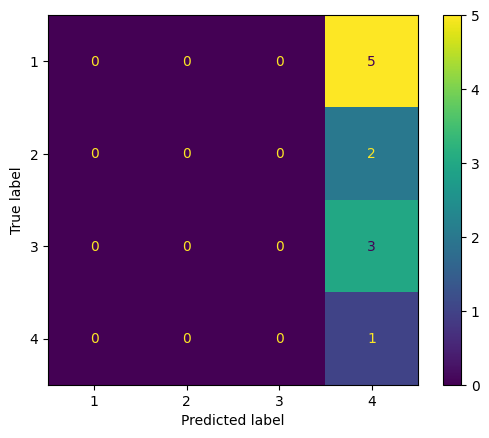

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(grid_model, X_test, y_test)


In [33]:
y_pred = grid_model.predict(scaled_X_test)

In [34]:
y_pred

array([1, 1, 1, 1, 4, 2, 2, 1, 3, 3, 3])

In [35]:
accuracy_score(y_test,y_pred)

0.8181818181818182